In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [42]:
# read in data
path='../runs/grid7/'
df = pd.read_pickle(path+'df_summary.pkl')

df.val_mae_mean = df.val_mae_mean.apply(lambda x: x.numpy())
df.val_std_mean = df.val_std_mean.apply(lambda x: x.numpy())

In [43]:
df.head()

,model_type,epochs,early_stopping_epoch,batch_size,lrG,flipout,kl_pref,dropout,spatial_dropout,val_mae,train_mae,train_loss,train_losses_total,train_losses_mae,val_losses_total,val_mae_mean,val_std_mean
0,bayesian-unet,40,34,64,0.005,False,1.0,0.00,True,216.962677,188.588096,188.588151,"[250.88873697916668, 243.57467447916667, 235.3...","[250.88875071831978, 243.57472217295782, 235.3...","[274.1088, 266.93646, 257.85022, 249.77383, 24...",216.962663,5.339757e-07
1,bayesian-unet,40,20,64,0.005,True,100.0,0.00,True,221.858307,197.214014,201.020703,"[259.4293402777778, 251.45753038194445, 242.64...","[250.03984862596985, 243.42804139193237, 235.5...","[273.45404, 265.83185, 257.112, 249.12012, 243...",220.682548,1.302820e+01
2,bayesian-unet,40,28,64,0.005,True,1000.0,0.00,True,217.491653,190.741078,191.551823,"[250.99813368055555, 244.28103298611111, 236.1...","[250.01770498236667, 243.34762679049916, 235.2...","[273.0011, 264.8262, 255.87015, 248.01529, 242...",217.190812,8.836216e+00
3,bayesian-unet,40,27,64,0.005,True,10000.0,0.00,True,215.637421,191.801659,191.904275,"[250.16571180555556, 243.46545138888888, 235.4...","[250.06431500381157, 243.36435187169184, 235.3...","[273.0868, 264.3902, 257.04303, 249.79605, 243...",215.542039,6.668664e+00
4,bayesian-unet,40,39,64,0.005,False,1.0,0.01,True,217.535156,191.542281,191.542274,"[250.90078125, 243.49255642361112, 235.5070095...","[250.90078239431278, 243.49256345055628, 235.5...","[274.12152, 267.11945, 257.31244, 249.64938, 2...",215.377784,2.208496e+01


In [44]:
df.dropout.unique()

array([0.   , 0.01 , 0.05 , 0.1  , 0.3  , 0.5  , 0.025, 0.075, 0.125])

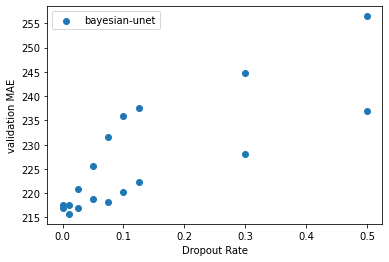

In [45]:
for model_type in df.model_type.unique():
    df_plot = df[(df.flipout==False)&(df.model_type==model_type)]
    plt.scatter(df_plot.dropout,df_plot.val_mae,label=model_type)
    plt.legend()
    plt.xlabel('Dropout Rate')
    plt.ylabel('validation MAE')

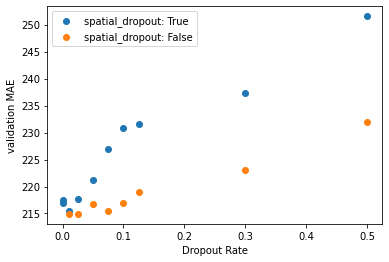

In [46]:
for spatial_do in df.spatial_dropout.unique():
    df_unet=df[(df.model_type=='bayesian-unet') & (df.kl_pref==1.0) & (df.flipout==False) & (df.spatial_dropout==spatial_do)]
    plt.scatter(df_unet.dropout,df_unet.val_mae_mean,label='spatial_dropout: {}'.format(spatial_do))
    plt.legend()
    plt.xlabel('Dropout Rate')
    plt.ylabel('validation MAE')
plt.savefig(path+'spatial_comparison.png',bbox_inches='tight')

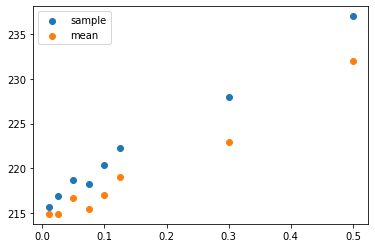

In [47]:
# sample vs. mean
spatial_do=False
df_unet=df[(df.model_type=='bayesian-unet') & (df.kl_pref==1.0) & (df.flipout==False) & (df.spatial_dropout==spatial_do)]
plt.scatter(df_unet.dropout,df_unet.val_mae,label='sample')
plt.scatter(df_unet.dropout,df_unet.val_mae_mean,label='mean')
plt.legend()

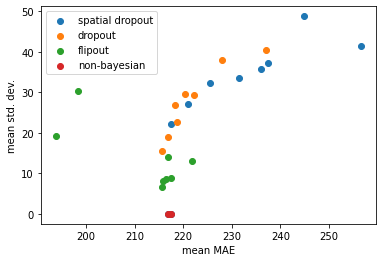

In [48]:
df_unet_spatial_True = df[(df.model_type=='bayesian-unet') & (df.kl_pref==1.0) & (df.flipout==False) & (df.spatial_dropout==True)]
df_unet_spatial_False = df[(df.model_type=='bayesian-unet') & (df.kl_pref==1.0) & (df.flipout==False) & (df.spatial_dropout==False)]
df_unet_flipout = df[(df.model_type=='bayesian-unet') & (df.flipout==True)]
plt.scatter(df_unet_spatial_True.val_mae, df_unet_spatial_True.val_std_mean,label='spatial dropout')
plt.scatter(df_unet_spatial_False.val_mae, df_unet_spatial_False.val_std_mean,label='dropout')
plt.scatter(df_unet_flipout.val_mae, df_unet_flipout.val_std_mean,label='flipout')
plt.scatter(df_unet_spatial_True[df_unet_spatial_True.dropout==0.0].val_mae,df_unet_spatial_True[df_unet_spatial_True.dropout==0.0].val_std_mean,label='non-bayesian')
plt.xlabel('mean MAE')
plt.ylabel('mean std. dev.')
plt.legend()

In [49]:
# mars-moon has weird features
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 10000.0
spatial_dropout = True
dropout = 0.
flipout=True
model_folder='bayesian-mars-moon_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 

kl_pref = 1.0
spatial_dropout = False
dropout = 0.1
flipout= False
model_folder='bayesian-mars-moon_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 
plt.savefig(path+'weird_mars_moon.png',bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../runs/grid7/bayesian-mars-moon_bsize_64_lrG_0.005_epochs_40_klpref_10000.0_spatialDropout_True_dropout_0.0_flipout_True/Sample_idx_5.png'

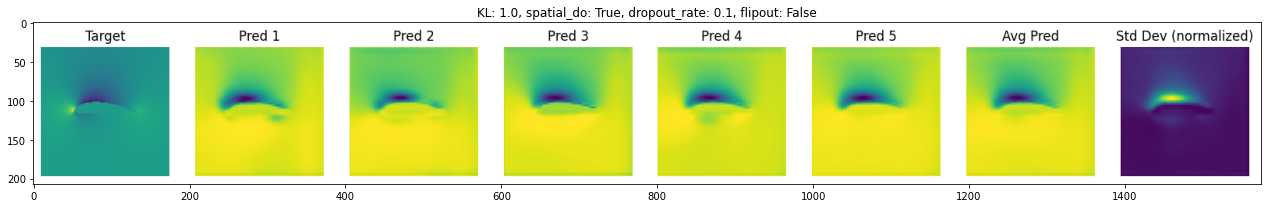

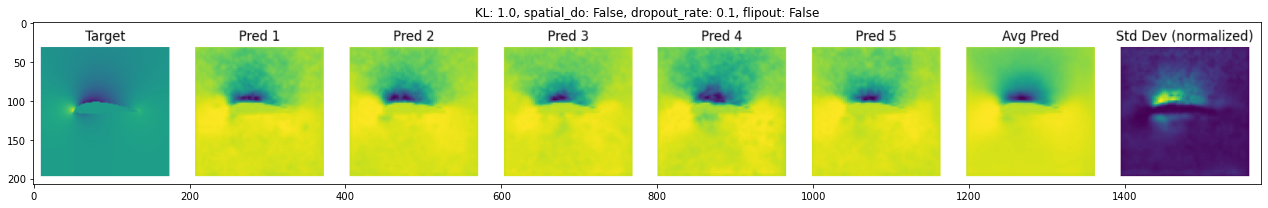

In [50]:
# difference between spatial dropout and normal dropout
# spatial seems to generate more sensible solutions
# normal dropout has unrealistic fine features, but average is good

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 1.0
spatial_dropout = True
dropout = 0.1
flipout= False
model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 
plt.savefig(path+'spatial_do_True_example.png',bbox_inches='tight')

kl_pref = 1.0
spatial_dropout = False
dropout = 0.1
flipout= False
model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 
plt.savefig(path+'spatial_do_False_example.png',bbox_inches='tight')


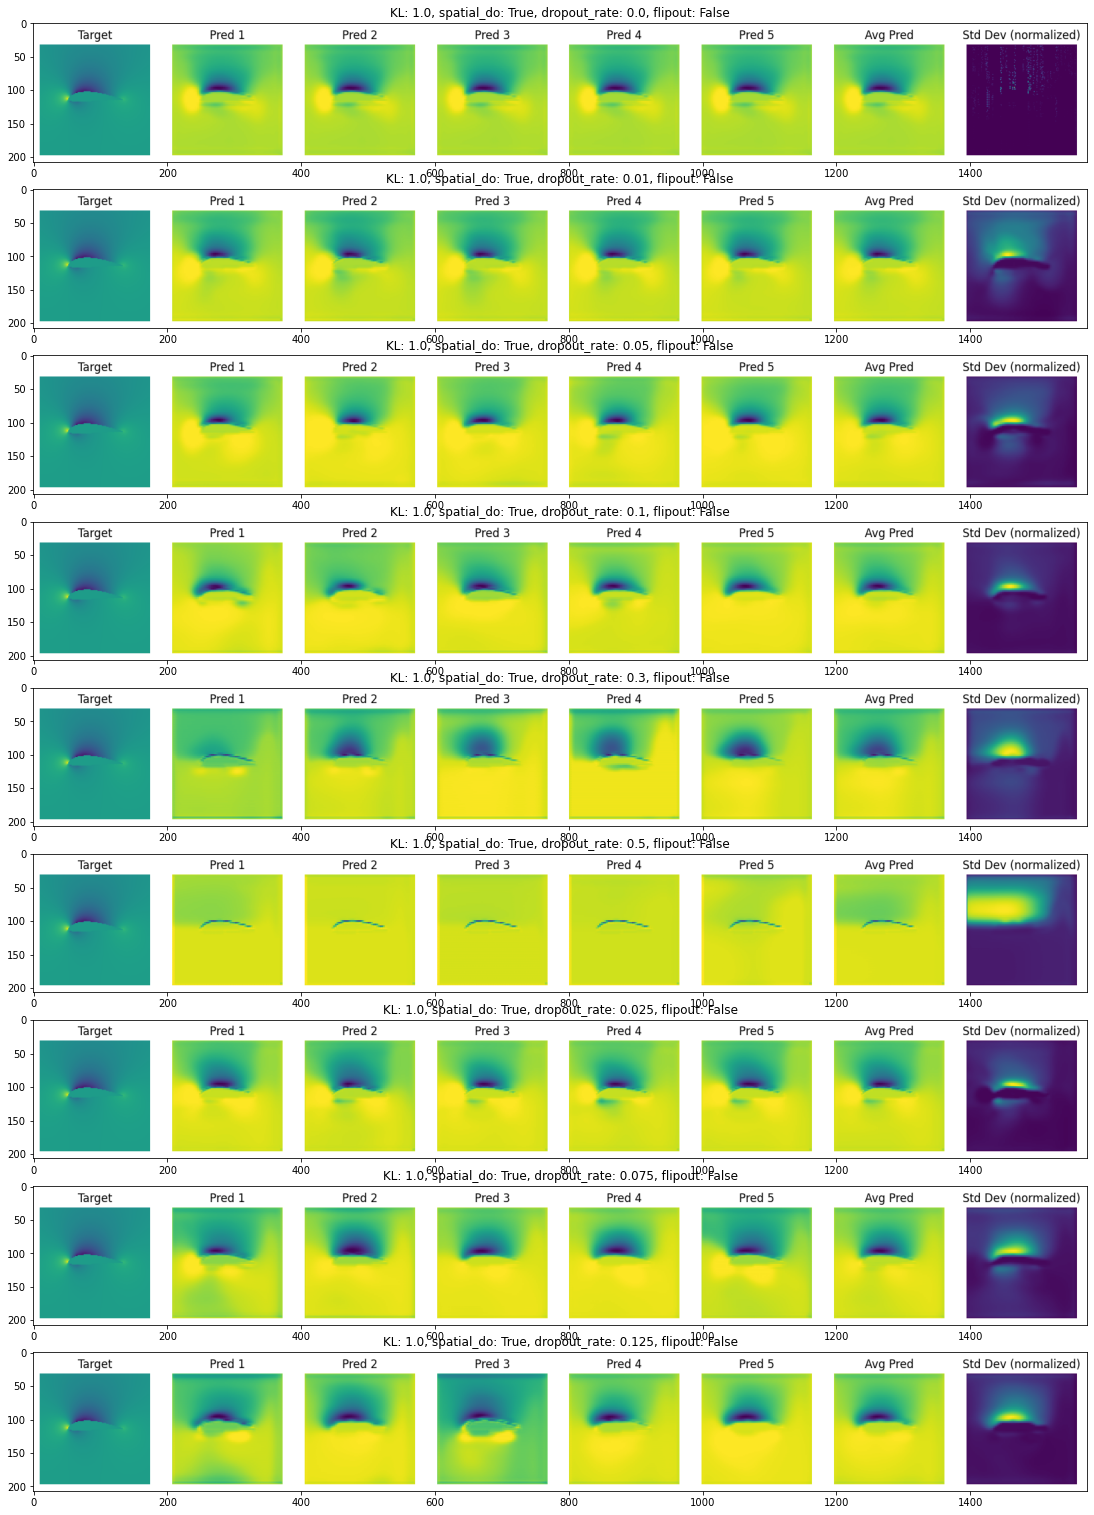

In [51]:
# effect of dropout rates - spatial dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 1.0
spatial_dropout = True
flipout= False
fig, axs = plt.subplots(figsize=(28,3*len(df.dropout.unique())),nrows=len(df.dropout.unique()))
for i,dropout in enumerate(df.dropout.unique()):
    model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
    sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
    axs[i].set_title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
    axs[i].imshow(sample_image) 
    #plt.show()  #
#plt.savefig(path+'SpatialDropout_True_samples.png',bbox_inches='tight')

# effect of dropout rates - spatial dropout
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# kl_pref = 1.0
# spatial_dropout = True
# flipout= False
# for dropout in df.dropout.unique():
#     model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
#     sample_image=(mpimg.imread('/home/maximilian/Dokumente/Studium/Werkstudentenjob/Nils/airfoils_tensorflow/runs_servus/grid2/'+model_folder+'Sample_idx_5.png'))
#     plt.figure(figsize=(22,3))
#     plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
#     plt.imshow(sample_image) 
#     plt.show()  #

In [52]:
df[df.dropout!=0].dropout.unique()

array([0.01 , 0.05 , 0.1  , 0.3  , 0.5  , 0.025, 0.075, 0.125])

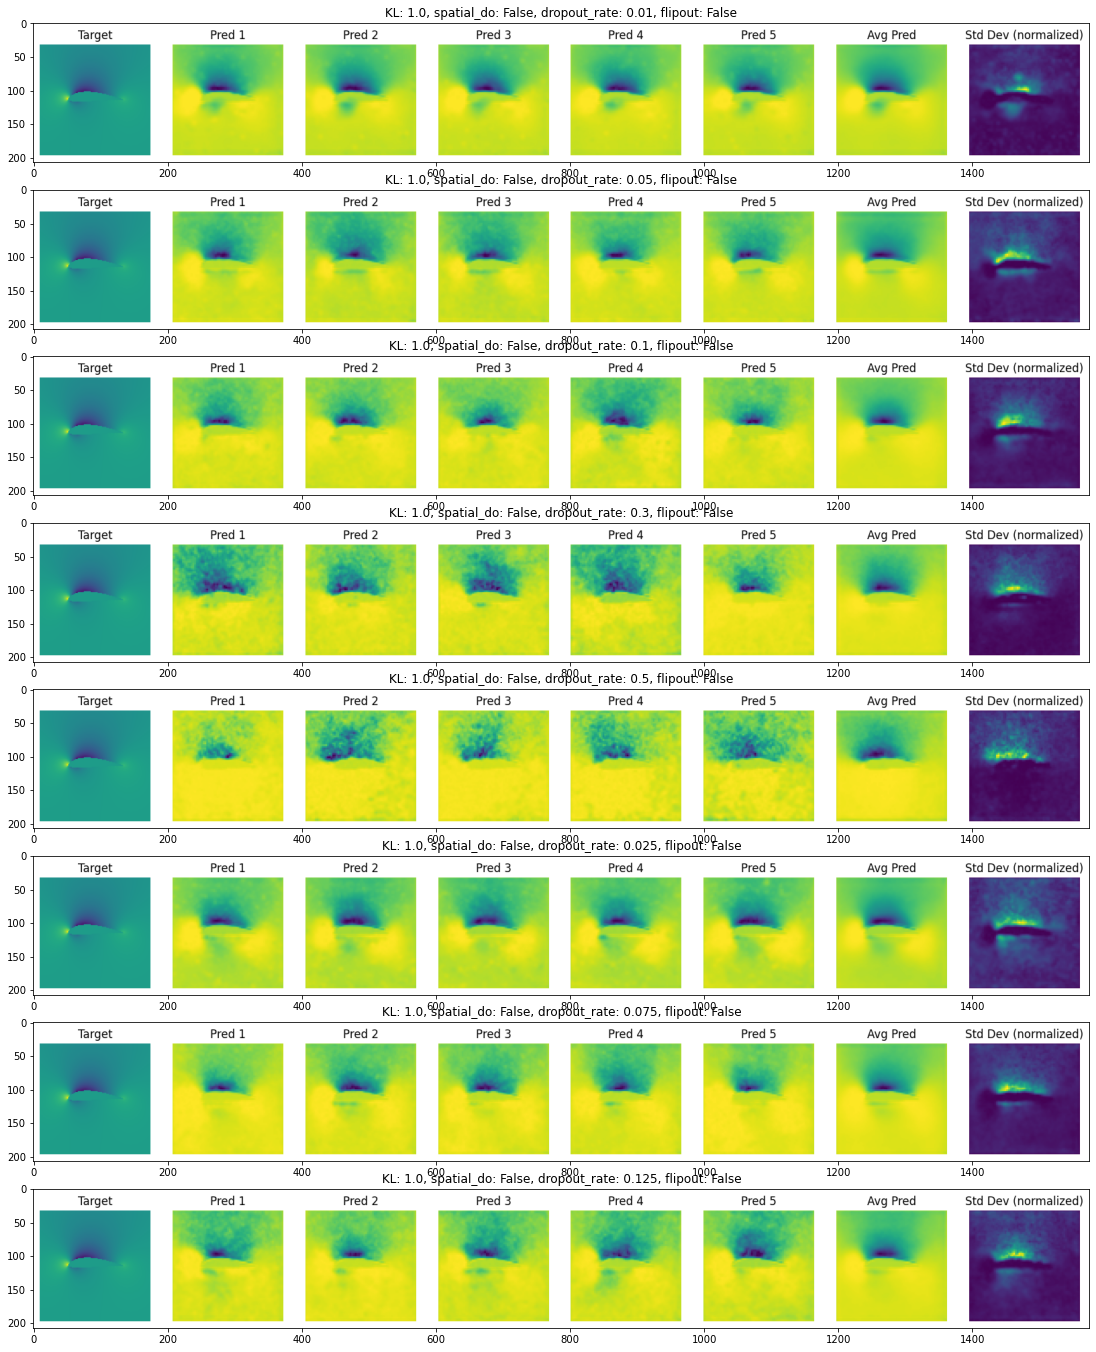

In [53]:
# # effect of dropout rates - no spatial dropout
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# kl_pref = 1.0
# spatial_dropout = False
# flipout= False
# for dropout in df.dropout.unique():
#     if dropout != 0.:
#         model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
#         sample_image=(mpimg.imread('/home/maximilian/Dokumente/Studium/Werkstudentenjob/Nils/airfoils_tensorflow/runs_servus/grid2/'+model_folder+'Sample_idx_5.png'))
#         plt.figure(figsize=(22,3))
#         plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
#         plt.imshow(sample_image) 
#         plt.show()  #
        
# effect of dropout rates - no spatial dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 1.0
spatial_dropout = False
flipout= False
fig, axs = plt.subplots(figsize=(28,3*(len(df.dropout.unique())-1)),nrows=len(df.dropout.unique())-1)
for i,dropout in enumerate(df[df.dropout!=0].dropout.unique()):
        model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
        sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
        axs[i].set_title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
        axs[i].imshow(sample_image) 
    #plt.show()  
#plt.savefig(path+'SpatialDropout_False_samples.png',bbox_inches='tight')


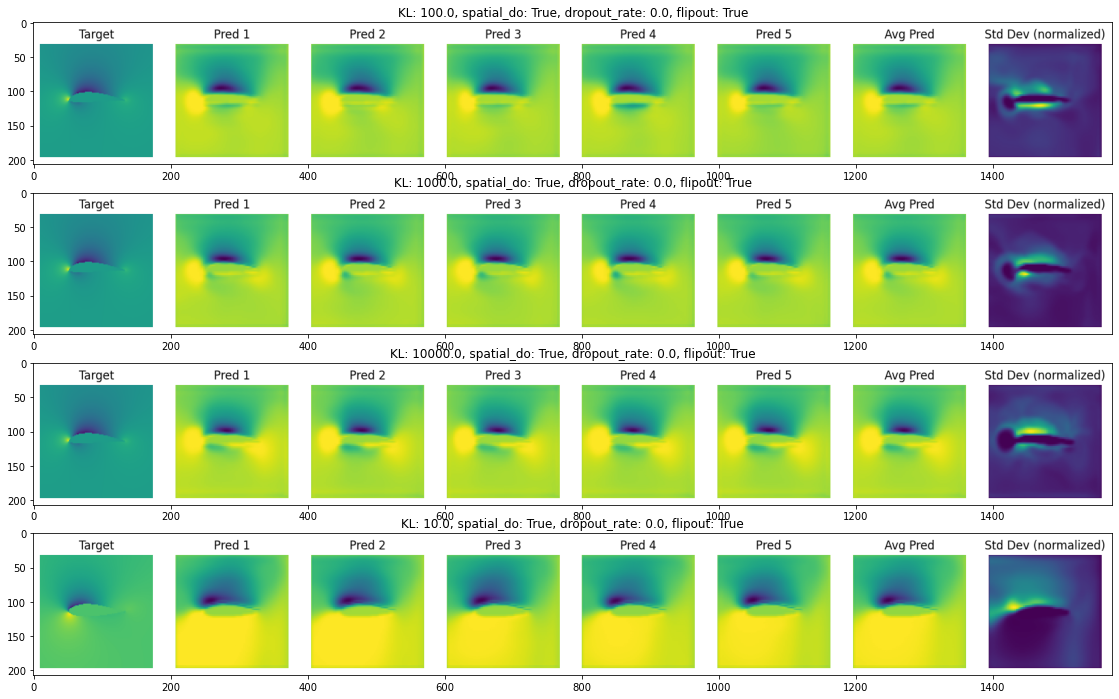

<Figure size 432x288 with 0 Axes>

In [54]:
# effect of flipout rates
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
spatial_dropout = True
dropout=0.
flipout= True
fig, axs = plt.subplots(figsize=(28,3*(len(df.kl_pref.unique())-1)),nrows=len(df.kl_pref.unique())-1)
for i,kl_pref in enumerate(df.kl_pref[df.kl_pref!=1.].unique()):
    model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
    sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
    axs[i].set_title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
    axs[i].imshow(sample_image) 
plt.show()  
plt.savefig(path+'Flipout_samples.png',bbox_inches='tight')


In [38]:
model_folder

'bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_10000.0_spatialDropout_True_dropout_0.0_flipout_True/'

In [13]:
import pandas as pd
df=pd.DataFrame({'model_type':[2],'epochs':[2], 'early_stopping_epoch':[2], 'batch_size':[2],'lrG':[2],'flipout':[2], 'kl_pref':[2],
                     'dropout':[2], 'spatial_dropout':[2], 'val_mae':[2],'train_mae':[2], 'train_loss':[-1],
                     'train_losses_total':[2], 'train_losses_mae':[2], 'val_losses_total':[2], 'val_mae_mean'=[2], 'val_std_mean':[2]})


SyntaxError: invalid syntax (<ipython-input-13-04564d9053ea>, line 4)

In [57]:
stop = False
val_maes = [7,6,5,4,2,4,4]
if all([i>val_maes[-4] for i in val_maes[-3:]]):
    stop = True
print(stop)

False


In [68]:
any([i<val_maes[-4] for i in val_maes[-3:]])

True

In [59]:
val_maes[-4]

4

In [60]:
val_maes[-3:]

[2, 4, 4]